In [22]:
import pandas as pd
from scipy.optimize import curve_fit
import plotly
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("GAP.csv")

In [3]:
df.head()

,gradient,adjustment
0,-34.875635,1.697577
1,-34.676518,1.689479
2,-34.477401,1.681920
3,-34.278284,1.674092
4,-34.079167,1.666534


In [67]:
def f(x,a,b):
    return a*x**2 + b*x + 1

In [68]:
res = curve_fit(f, df['gradient'], df['adjustment'])

In [69]:
print(res[0])

[0.00148557 0.02848108]


In [70]:
df['fit'] = f(df['gradient'],*res[0])

In [71]:
df.head()

,gradient,adjustment,fit,fit2
0,-34.875635,1.697577,1.813618,2.077006
1,-34.676518,1.689479,1.798716,2.058849
2,-34.477401,1.681920,1.783931,2.040829
3,-34.278284,1.674092,1.769264,2.022947
4,-34.079167,1.666534,1.754715,2.005203


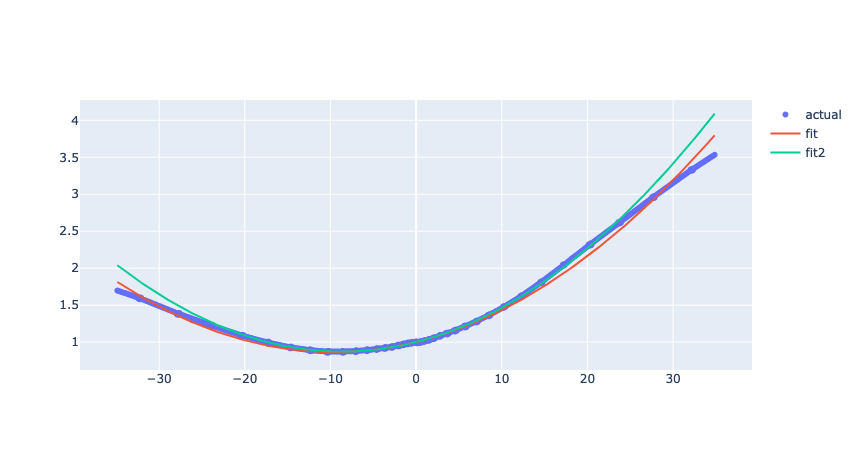

In [76]:
fig = go.Figure(data=go.Scatter(
    x=df['gradient'],
    y=df['adjustment'],mode="markers",
name="actual"))

fig.add_trace(go.Scatter(
    x=df['gradient'], y=df['fit'],mode="lines",
name="fit"))

fig.add_trace(go.Scatter(
    x=df['gradient'], y=df['fit2'],mode="lines",
name="fit2"))

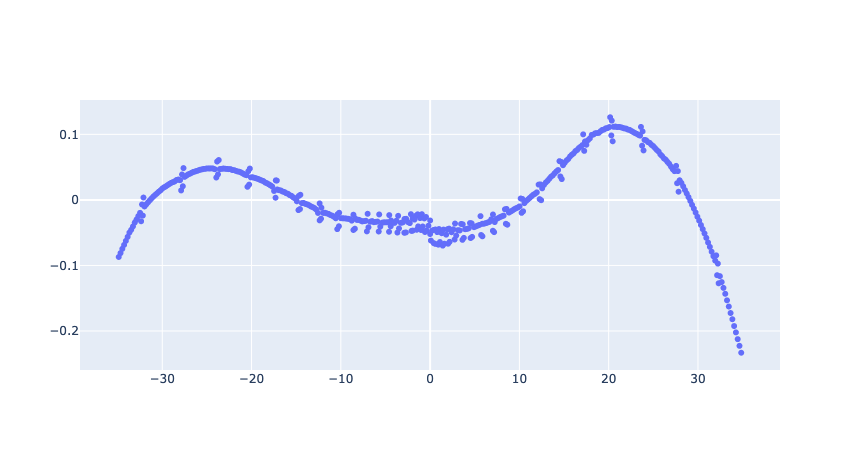

In [44]:
fig = go.Figure(data=go.Scatter(
    x=df['gradient'],
    y=df['adjustment']-df['fit'],mode="markers",
name="error"))
fig.show()

In [56]:
#get a smaller dataframe for a git -15 - 15
filt = (df['gradient'] < 15) & (df['gradient'] > -15)

In [72]:
dffilt = df[filt]

In [73]:
res2 = curve_fit(f, dffilt['gradient'], dffilt['adjustment'])

In [74]:
res2

(array([0.0017002 , 0.02949656]),
 array([[ 7.74048673e-11, -1.76899582e-12],
        [-1.76899582e-12,  1.04814350e-08]]))

In [75]:
df['fit2'] = f(df['gradient'],*res2[0])